In [76]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import RandomOverSampler

In [77]:
df = pd.read_csv(r"C:\Users\jenar\!clases\TC2004B-Jenaro\seattle-weather(in).csv")
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain
5,1/6/2012,2.5,4.4,2.2,2.2,rain
6,1/7/2012,0.0,7.2,2.8,2.3,rain
7,1/8/2012,0.0,10.0,2.8,2.0,sun
8,1/9/2012,4.3,9.4,5.0,3.4,rain
9,1/10/2012,1.0,6.1,0.6,3.4,rain


In [78]:
df = df.drop("date", axis=1)

In [79]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   str    
dtypes: float64(4), str(1)
memory usage: 57.2 KB


In [80]:
print(df["weather"].value_counts())

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64


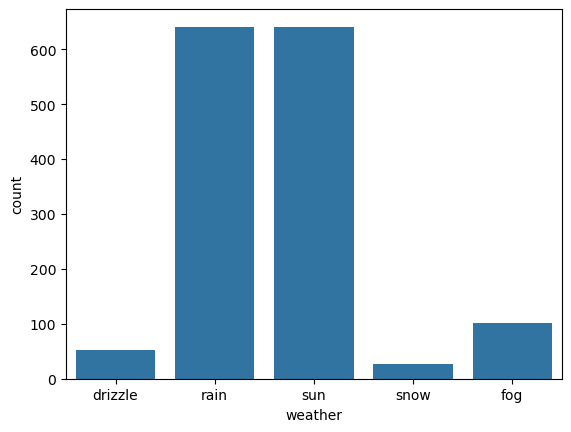

In [81]:
sns.countplot(x='weather', data=df)
plt.show()

In [82]:
df_int = df
df_int['weather_int'] = df_int['weather']
df_int.weather_int = df_int.weather_int.map({'drizzle':0, 'rain':1, 'sun':2, 'snow':3, 'fog':4})
df = df.drop("weather", axis=1)
df.head(10)

,precipitation,temp_max,temp_min,wind,weather_int
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,1
2,0.8,11.7,7.2,2.3,1
3,20.3,12.2,5.6,4.7,1
4,1.3,8.9,2.8,6.1,1
5,2.5,4.4,2.2,2.2,1
6,0.0,7.2,2.8,2.3,1
7,0.0,10.0,2.8,2.0,2
8,4.3,9.4,5.0,3.4,1
9,1.0,6.1,0.6,3.4,1


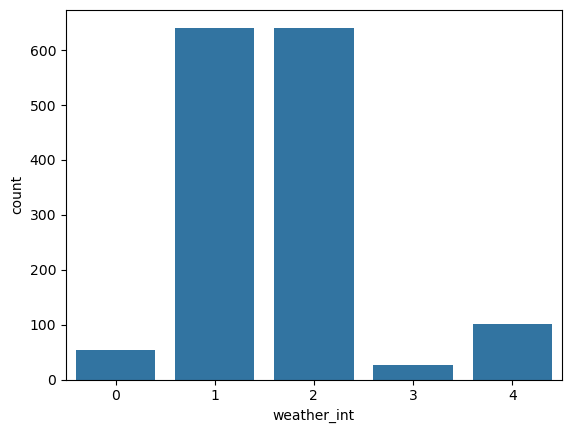

In [83]:
sns.countplot(x='weather_int', data=df)
plt.show()

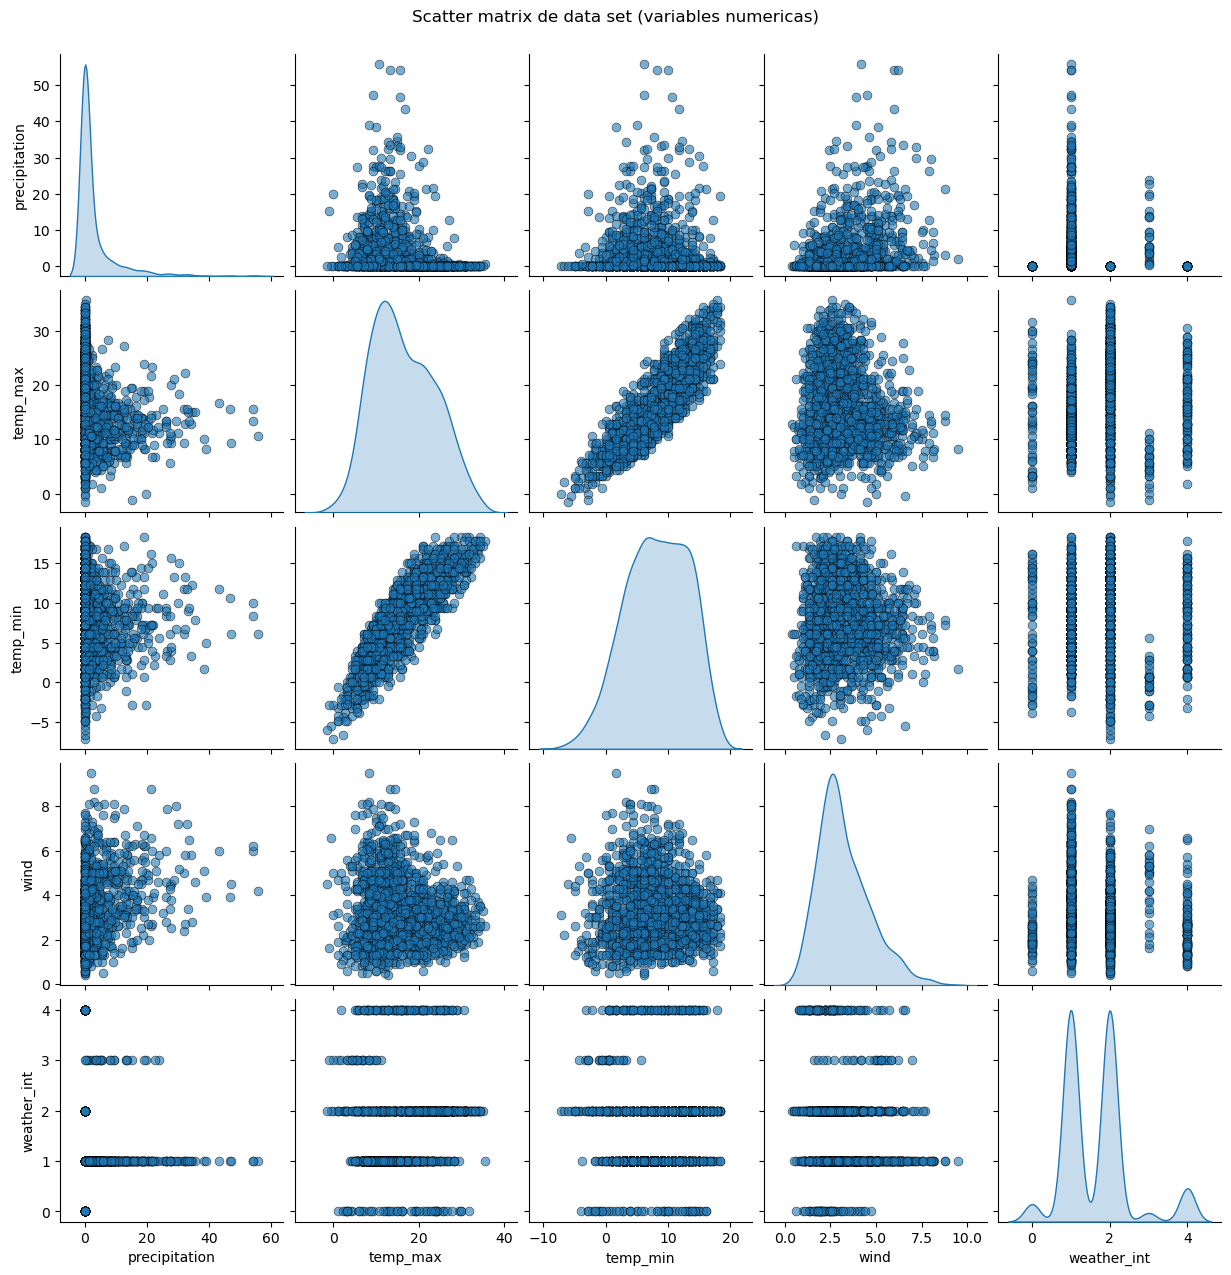

In [84]:
#primero haremos un scatter matrix
sns.pairplot(
    df,
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'}
)

# Add a title
plt.suptitle("Scatter matrix de data set (variables numericas)", y=1.02)
plt.show()

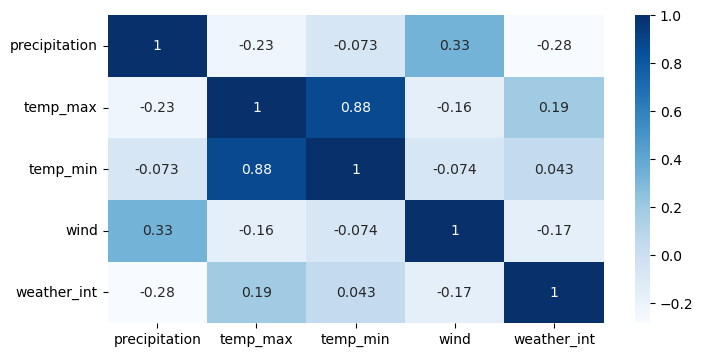

In [85]:
fig = plt.figure(figsize=(8,4)) 
sns.heatmap(df.corr(),annot=True, cmap = 'Blues') 
plt.show()

In [86]:
X = df[['precipitation','temp_max','temp_min','wind']]
y = df[['weather_int']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(np.shape(X_train))
print(np.shape(X_test))

(1022, 4)
(439, 4)


In [87]:
X = df[['precipitation','temp_max','temp_min','wind']]

vif = pd.DataFrame()

vif["Variable"] = X.columns

vif["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

print(vif)

        Variable        VIF
0  precipitation   1.463825
1       temp_max  19.256535
2       temp_min  15.604901
3           wind   3.798018


In [88]:
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)


In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_balanced, y_train_balanced)


In [ ]:
# y_pred = clf.predict(X_test)
# print('Prediccion ', y_pred)
# print('Especie real', np.reshape(y_test,(1,439)))

Prediccion  [2 1 0 0 1 1 2 2 1 0 2 2 1 0 1 1 2 2 2 2 1 2 1 2 2 1 0 2 0 4 1 2 4 1 4 1 1
 1 1 2 1 2 0 2 2 1 1 2 1 2 2 1 2 1 2 1 1 2 1 2 1 2 1 2 2 2 1 2 1 1 1 2 4 3
 1 4 1 4 1 1 1 2 1 2 1 0 2 1 0 1 1 2 2 1 1 2 2 1 2 1 2 2 1 3 1 2 2 1 4 1 1
 2 1 1 0 2 4 2 2 1 1 1 1 1 2 2 2 4 2 2 2 2 2 0 2 2 1 1 1 2 2 2 1 1 2 2 2 1
 4 2 1 2 2 2 1 1 4 2 1 1 4 2 1 2 4 1 1 4 2 2 1 1 4 2 1 1 0 2 2 1 2 0 2 1 1
 2 1 1 2 2 2 2 2 1 2 2 2 1 1 1 1 0 0 1 4 1 3 2 3 0 1 2 2 2 2 2 2 2 1 2 1 2
 2 2 2 1 2 1 2 3 2 1 2 2 1 2 0 2 2 2 1 1 2 3 0 2 2 2 1 1 1 1 1 2 2 0 1 2 1
 1 1 1 2 1 2 2 1 4 2 4 4 2 2 1 2 2 1 1 2 2 2 1 2 4 2 2 1 2 2 1 4 1 2 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 4 1 2 1 1 1 2 1 2 4 1 2 4 1 1 1 2 2 1 1 2 2 2 2 1 1
 1 2 2 1 1 1 1 1 2 1 1 2 1 2 4 1 1 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 4 4 2 4
 1 1 1 1 1 0 1 1 1 2 1 4 0 2 4 1 1 4 2 1 1 2 2 2 1 2 0 2 1 1 1 2 2 2 4 1 2
 2 4 2 2 2 2 2 2 2 1 1 2 2 1 2 4 2 2 1 2 2 1 2 1 4 2 2 1 1 4 1 2]
Especie real [[2 1 1 2 1 1 1 2 1 2 2 2 1 2 4 1 2 4 4 2 1 1 1 2 4 1 2 2 4 2 1 2 2 3 2 1
  1 1 1 2 

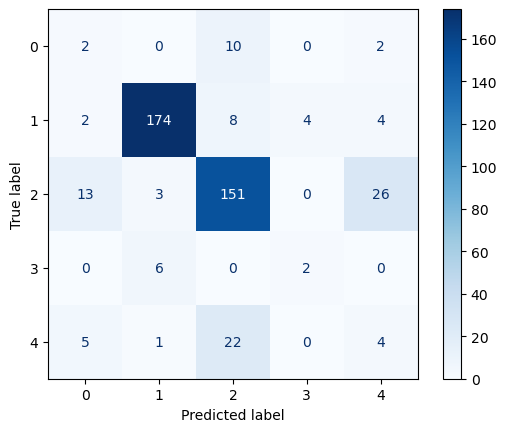

In [ ]:
# cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
# disp.plot(cmap=plt.cm.Blues)
# plt.show()
# {'drizzle':0, 'rain':1, 'sun':2, 'snow':3, 'fog':4})
